# QuGAN Implementation

In [82]:
%load_ext autoreload
%autoreload 1
%aimport QuGAN_utils
from QuGAN_utils import *
from qiskit import Aer

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import importlib
import numpy as np
# import QuGAN_utils
# importlib.reload(QuGAN_utils)
# from QuGAN_utils import *

In [91]:
q_inst = QuantumInstance(backend=Aer.get_backend('statevector_simulator'))
circ_sampler = CircuitSampler(q_inst,param_qobj=True)

In [60]:
D, D_params = create_QuGAN_ansatz(n_qubits=3,n_layer=4,param_label='D',register_label='d',out_reg_index=-1)
G, G_params = create_QuGAN_ansatz(n_qubits=2,n_layer=2,param_label='G',register_label='g',out_reg_index=0)
R = QuantumCircuit(2)
R.cx(1,0)

In [141]:
D.data[15][0].name

'rzz'

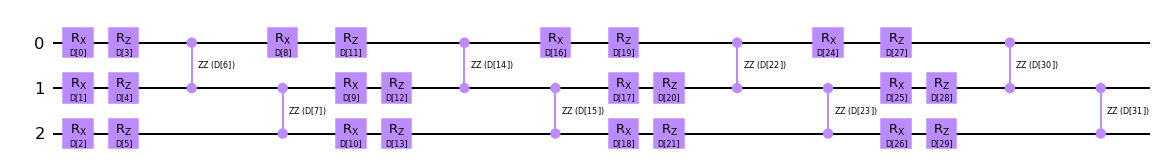

In [61]:
D.draw('mpl')

In [144]:
grad_storage = get_gradient_circuit_storage(D,G,R)

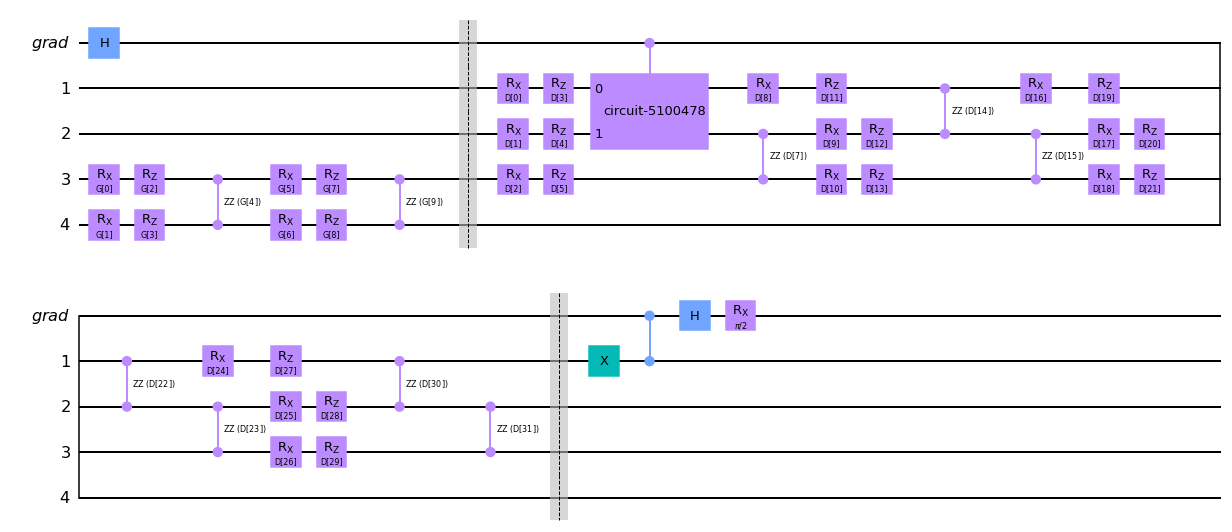

In [193]:
grad_storage[0][1][6].draw('mpl')

In [188]:
grad_D_with_G_circs = grad_storage[0][2]
return_list = allocate_parameters(grad_D_with_G_circs,param_frame_G=G_params,param_values_G=np.array([0.5,]*len(G_params)),
                                  param_frame_D=D_params, param_values_D=[0.7,]*len(D_params))

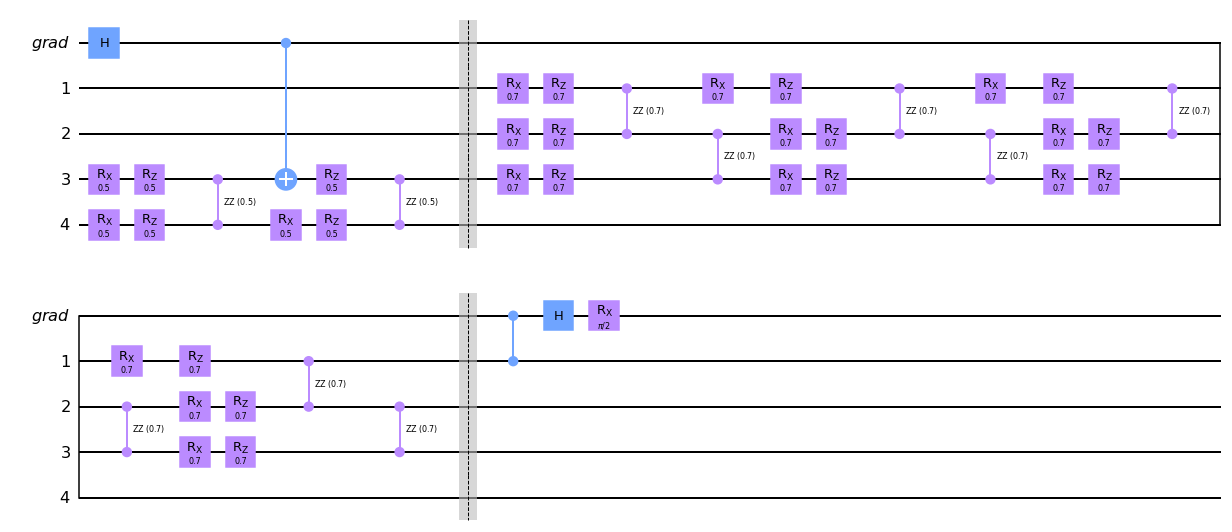

In [189]:
return_list[5].draw('mpl')

In [190]:
grad_exp_meas = AerPauliExpectation().convert(~StateFn(Z ^ (I ^ (return_list[0].num_qubits - 1))))
results = get_expectation_values(return_list,grad_exp_meas,circ_sampler)

In [191]:
results

array([ 5.93132798e-01, -6.14000000e-16,  6.39495917e-01,  7.70151153e-01,
        5.80786306e-01,  6.39495917e-01,  2.30000000e-17,  6.39495917e-01,
        6.39495917e-01,  6.39495917e-01])

In [180]:
G_trained, D_trained = train_bin_conditioned_QuGAN(R = R,n_qubits_G=2, n_layer_G=2, n_qubits_D= 3, n_layer_D= 4,
                                                   q_instance=q_inst,n_steps=10000,initial_rate=10,balance_rate=0.1,
                                                   retain_factor=800, const_threshold=4000)

Step: 0, learning rate: 10.0...
Step: 1, learning rate: 9.98763273115335...
Step: 2, learning rate: 9.975280911734854...


KeyboardInterrupt: 

In [126]:
RD_ansatz, GD_ansatz = get_performance_circuits(D,G,R,1)

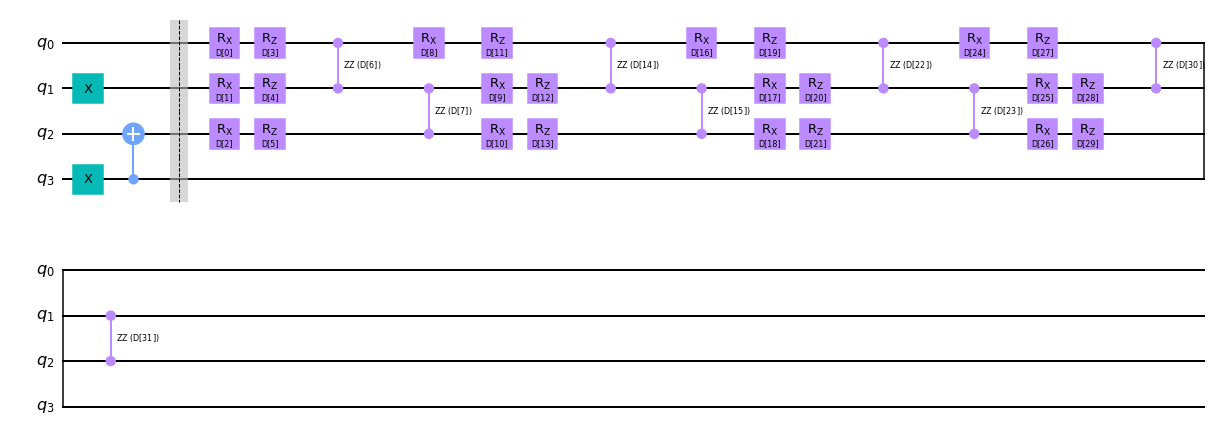

In [78]:
RD_ansatz.draw('mpl')

In [129]:
performance = get_performance(D,G,R,D_params,[3,]*len(D_params),G_params,[-2,]*len(G_params),circ_sampler)

In [130]:
performance

(-5.551115123125783e-17, -9.020562075079397e-17, 0.4999999999999999)

In [135]:
ParameterVector('D',3)

ParameterVector(name=D, length=3)